### Formula haosa
Radi se o jednostavnoj jednačini $x_n=x_n*r*(1-x_n)$ gde x označava npr. proporciju trenutne populacije (da li je dostigla svoju veličinu) a r predstavlja faktor skaliranja i rasta. Ova jednačina kao da dokazuje da se budućnost grana u više različitih nepredvidivih pravaca.

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def haos(x, r, n, prec):
    print ('Jednacina haosa: x(n+1)=rx(n)(1-x(n))')
    print (f'Proporcija trenutne populacije (visoka vrednost znaci da je dostigla svoju velicinu): {x}')
    print (f'Faktor skaliranja i rasta, kada je r = 2, populacija se udvostrucava, r=: {r}')
    print (f'raspon {n}')
    print (f'preciznost, broj decimala {prec}')
    
    tmp = []
    for i in range (n):
#         print(round(x, prec))
        x = x*r*(1-x)
        tmp.append(x)
    x = [i for i in range(n)]
    
    
    plt.figure(figsize=(20,10))
    plt.plot(x, tmp, color='blue', label='x')
    plt.xlabel('Broj iteracija')
    plt.ylabel('x')
    plt.title(f'Formula haosa')
    plt.legend(loc='best')
    

Jednacina haosa: x(n+1)=rx(n)(1-x(n))
Proporcija trenutne populacije (visoka vrednost znaci da je dostigla svoju velicinu): 0.7
Faktor skaliranja i rasta, kada je r = 2, populacija se udvostrucava, r=: 2.4
raspon 50
preciznost, broj decimala 3


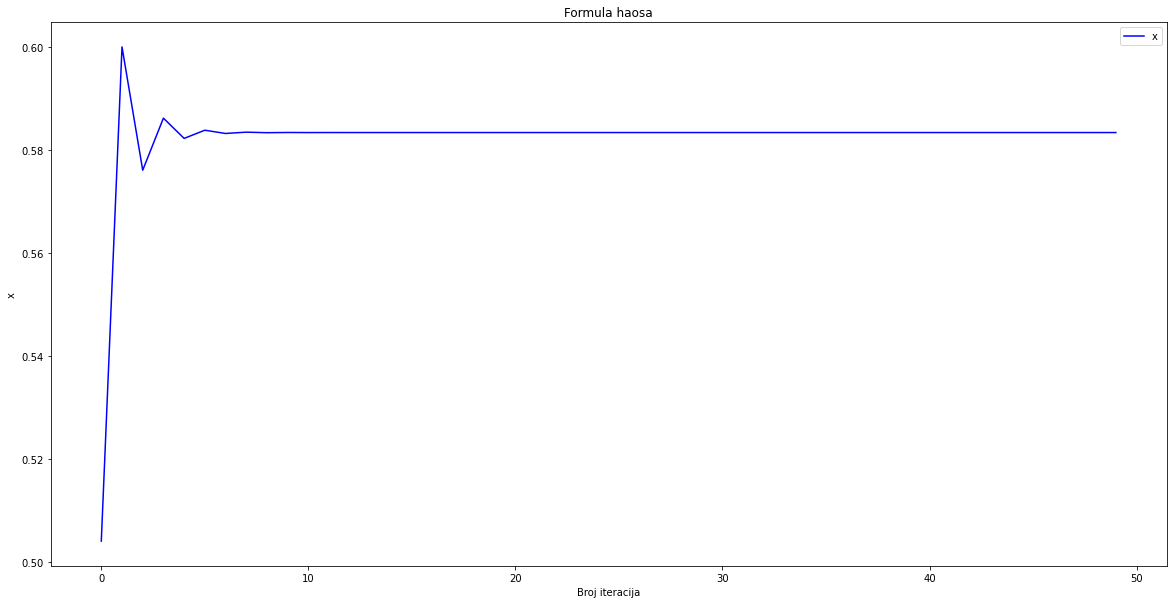

In [3]:
haos(0.7, 2.4, 50, 3)

Jednacina haosa: x(n+1)=rx(n)(1-x(n))
Proporcija trenutne populacije (visoka vrednost znaci da je dostigla svoju velicinu): 0.7
Faktor skaliranja i rasta, kada je r = 2, populacija se udvostrucava, r=: 3.2
raspon 100
preciznost, broj decimala 3


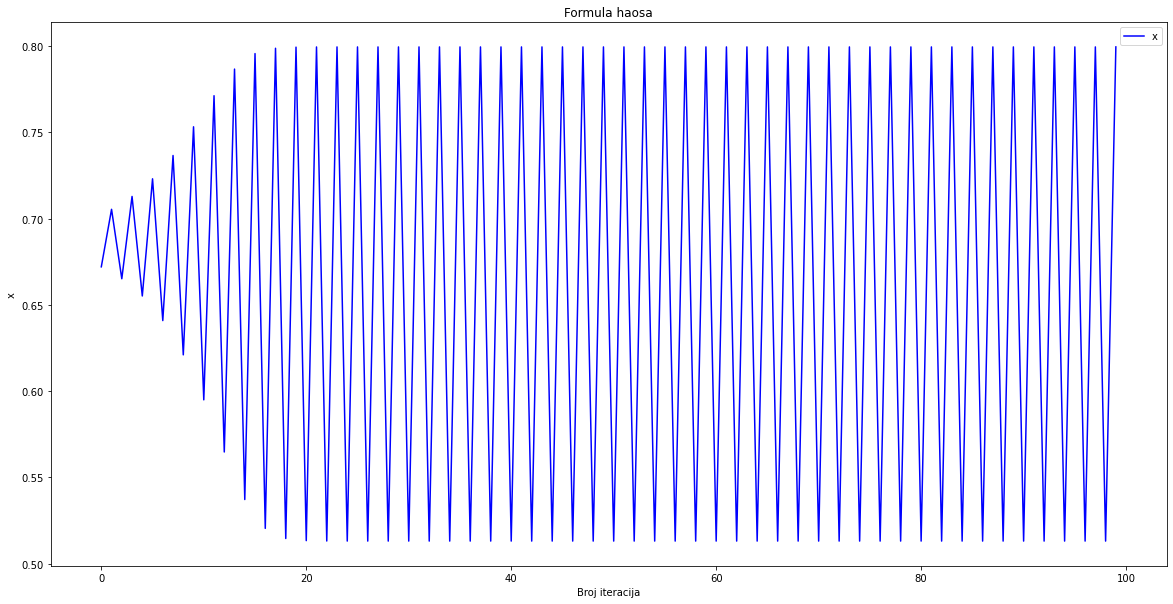

In [4]:
haos(0.7, 3.2, 100, 3)

In [5]:
def logistic(x,r):
    while True:
        yield x
        x=x*r*(1-x)

from itertools import islice
def cyclefinder(x,r):
    numbers = logistic(x,r)
    #preskacemo prvih milion iteracija
    numbers = islice(numbers, 10**6, None)
    seen = {}
    for iteration, x in enumerate(numbers):
        for element in seen:
            if abs(element-x)<1e-6:
                return iteration - seen[element]
        seen[x]=iteration
    return seen[x]

In [15]:
from tqdm import tqdm
def plotting_x_on_r(lista_x, lista_r, n):
    r_o=[]
    x_o=[]
    with tqdm(total=n) as pbar:
        for i in range(n):
            for x in lista_x:
                for r in lista_r:
                    x=x*r*(1-x)
                    x_o.append(x)
                    r_o.append(r)
            pbar.update(1)
    return r_o, x_o

In [6]:
iteracije = cyclefinder(0.7, 3.6)

In [20]:
import numpy as np
lista_r=np.arange(2.4,5,0.05).tolist()
lista_x=np.arange(0,1,0.001).tolist()

In [21]:
r, x = plotting_x_on_r(lista_x, lista_r, 1000)

100%|██████████| 1000/1000 [00:10<00:00, 97.16it/s]


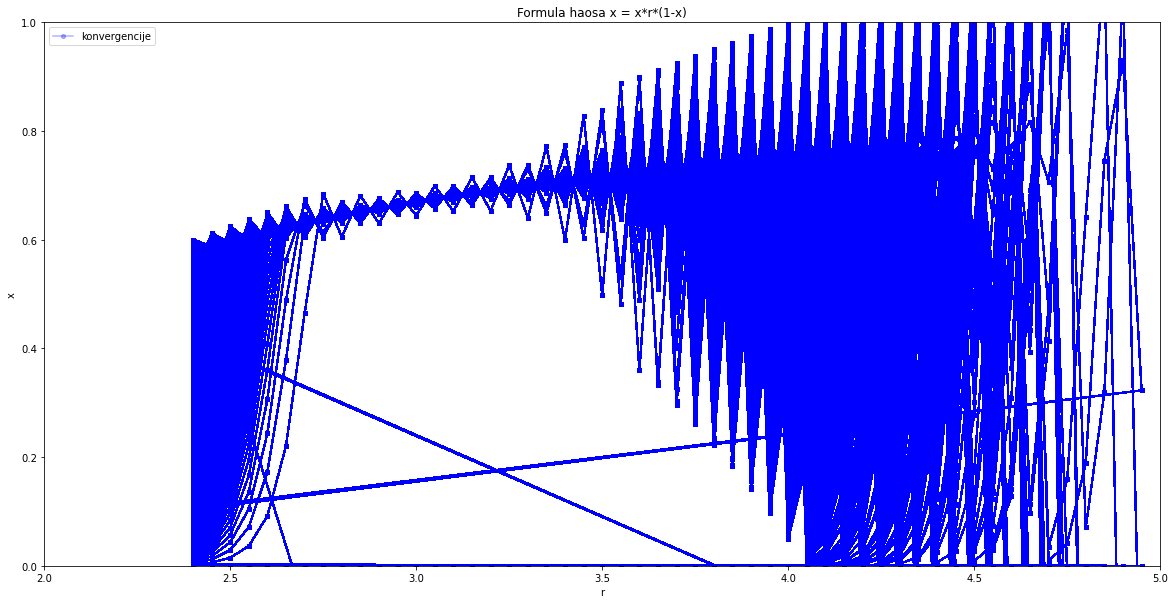

In [22]:
plt.figure(figsize=(20,10))
plt.plot(r, x, linestyle='-', marker = 'o',markersize='4', color='blue', alpha=0.3, label='konvergencije')
plt.xlabel('r')
plt.xlim(2,5)
plt.ylim(0,1)
plt.ylabel('x')
plt.title(f'Formula haosa x = x*r*(1-x)')
plt.legend(loc='best')
plt.show()

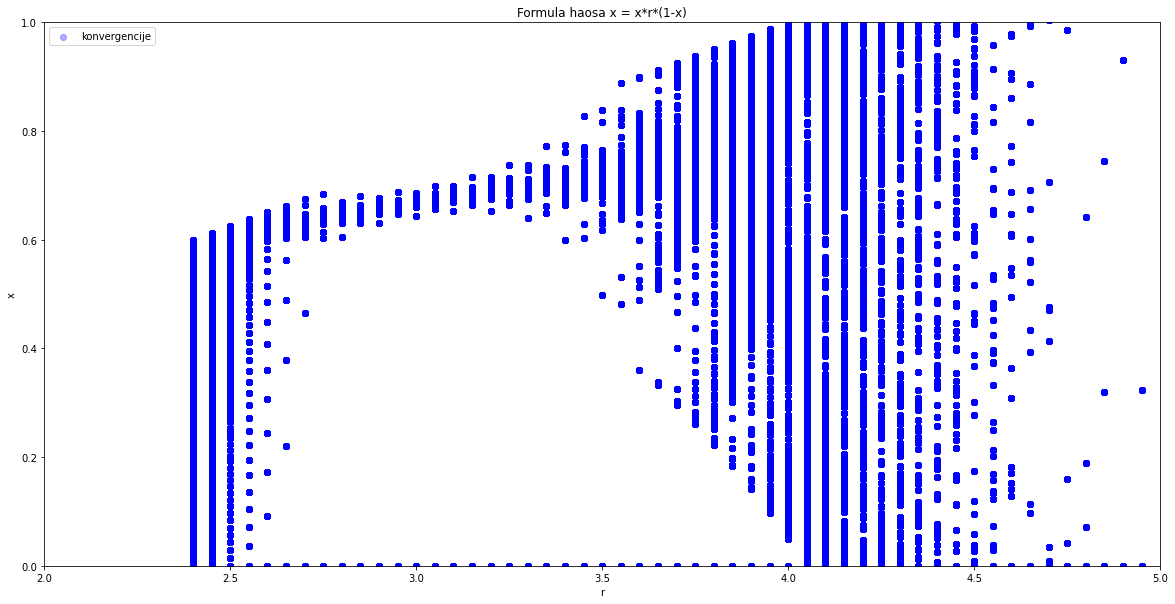

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(r, x, color='blue', alpha=0.3, label='konvergencije')
plt.xlabel('r')
plt.xlim(2,5)
plt.ylim(0,1)
plt.ylabel('x')
plt.title(f'Formula haosa x = x*r*(1-x)')
plt.legend(loc='best')
plt.show()